## Examples

In [1]:
from package.abn_mir_helper_functions import *
from package.bn_graph_methods import *
from package.plotting import *
from package.plotting import hamming_plots
import copy

In [2]:
net = select_network(20, 20, 30, 15, 30, 2000)[0]
print(net)
net.compute_unit_perturbations_matrix(0, False)
a_net = AbundantBooleanNetwork(1, [i for i in range(16)], 2, 400, 0)
a_net.from_boolean_network(net)
a_net.add_abundant_nodes(45)
# a_net.add_nested_nodes(16, 32, False, 64, True)
print(a_net)
setup_colors = get_colors(len(net.bn_collapsed_cycles) + 20, shuffled_if_true=True)
h_s = HammingSetup(net)

BooleanNetwork: N=20. avg_k= 1.45. Run-ins: 202. Observed cycles: 29. t_records: 202. u_records: 0
Cycle lengths: [24, 24, 24, 24, 24, 12, 12, 12, 12, 12, 12, 12, 12, 8, 8, 8, 8, 8, 6, 6, 6, 4, 4, 4, 4, 4, 4, 2, 2]
BooleanNetwork: N=20. avg_k= 1.45. Run-ins: 202. Observed cycles: 29. t_records: 202. u_records: 0
Cycle lengths: [24, 24, 24, 24, 24, 12, 12, 12, 12, 12, 12, 12, 12, 8, 8, 8, 8, 8, 6, 6, 6, 4, 4, 4, 4, 4, 4, 2, 2]


#### Boolean states over transitions as colormapped values

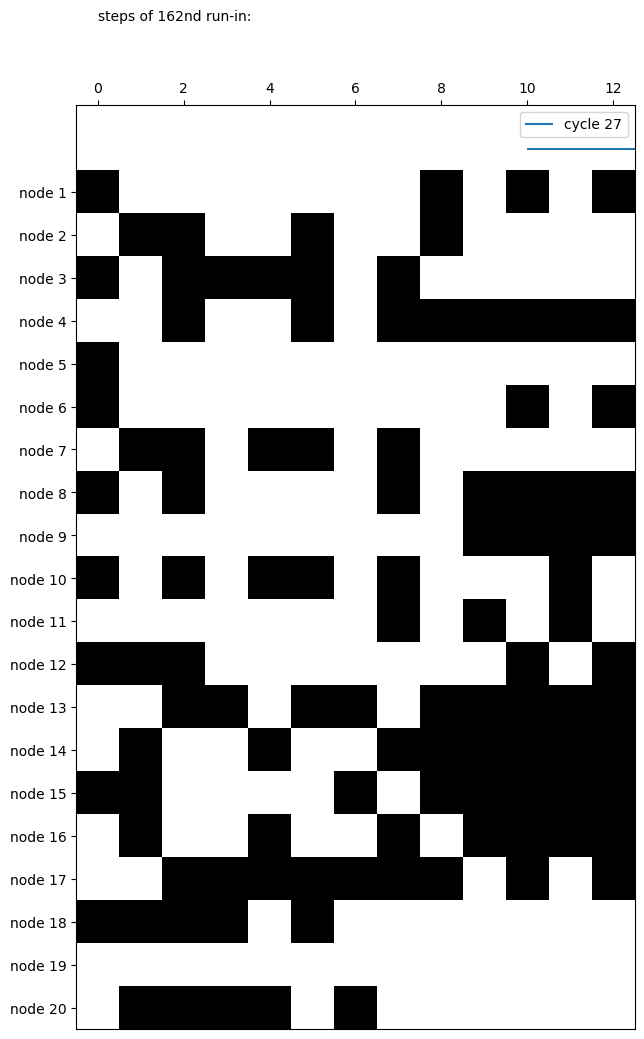

In [3]:
fig, ax = plt.subplots()
run_in = SystemRandom().randrange(0, len(net.list_of_all_run_ins))
plt.text(0, -4, f"steps of {get_ordinal_string(run_in, True)} run-in: ")
plt.imshow(np.transpose(net.list_of_all_run_ins[run_in]), cmap='gist_stern')
plt.yticks(ticks = [i for i in range(len(net))], labels = ["node " + str(i + 1) for i in range(len(net))])
fig.set_size_inches(12, 12)
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
i = 0
while not np.allclose(net.list_of_all_run_ins[run_in][i], net.list_of_all_run_ins[run_in][-1]):
    i += 1
ax.hlines(-1, i, ax.get_xlim()[1], label=f"cycle {net.bn_collapsed_cycles.get_index(net.list_of_all_run_ins[run_in][-1])}")
plt.legend(loc='upper right')
plt.show()

#### Polar plot of cycles where radius is Hamming distance to the consensus sequence of all cycle states

In [4]:
print(np.lcm.reduce([1, 2, 3]))

6


Radius: Hamming distance to consensus of cycle states
Theta: varied: 1 step == 2 * Pi / (cycle length)


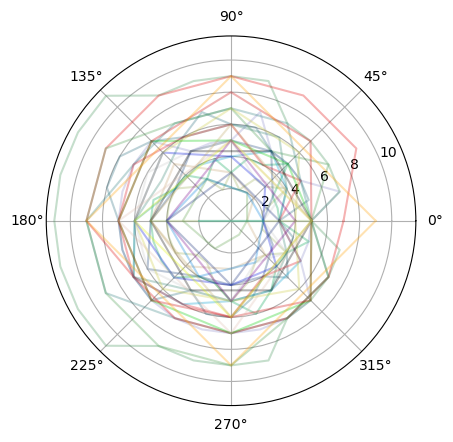

Radius: Hamming distance to consensus of cycle states
ppc_least_common_multiple: 2
ppc_least_common_multiple: 24
Theta: 1 step == 0.2617993877991494 radians


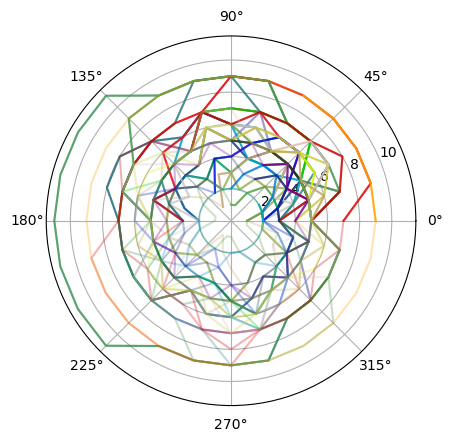

In [5]:
plot_polar_cycles_cons_hamm(net, plot_one_period_if_true=True, bv_colors=setup_colors)
plot_polar_cycles_cons_hamm(net, plot_one_period_if_true=False, bv_colors=setup_colors)

##### Polar plot of cycles with radius equal to the number of changed node states per step

Radius: step to step edit-distance
Assuming each cycle is 24 hours, 1 step == [60.0, 60.0, 60.0, 60.0, 60.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 180.0, 180.0, 180.0, 180.0, 180.0, 240.0, 240.0, 240.0, 360.0, 360.0, 360.0, 360.0, 360.0, 360.0, 720.0, 720.0] minutes


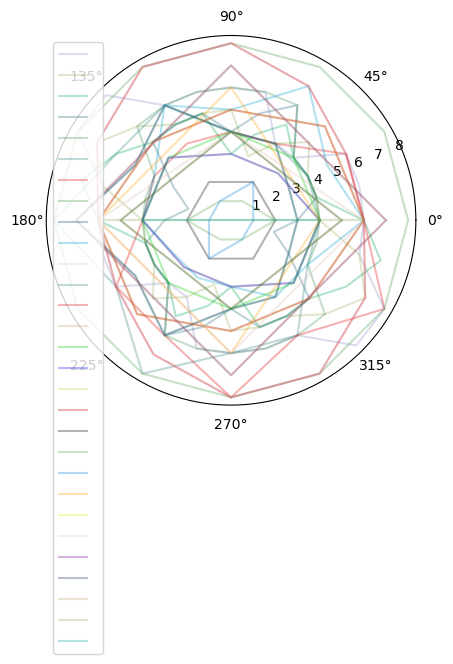

Radius: step to step edit-distance
ppc_least_common_multiple: 2
ppc_least_common_multiple: 24
Theta: 1 step == 0.2617993877991494 radians
least common multiple: 24


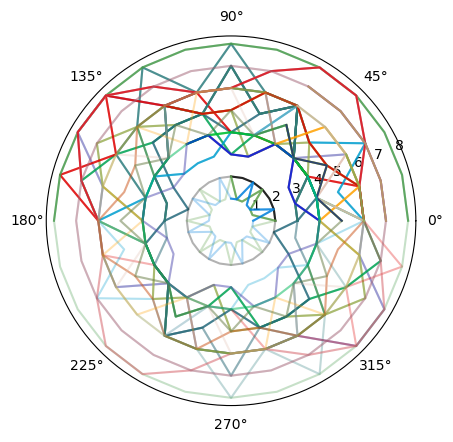

In [6]:
plot_polar_cycles_bv(net, plot_one_period_if_true=True, bv_colors=setup_colors)
plot_polar_cycles_bv(net, plot_one_period_if_true=False, bv_colors=setup_colors)

### Plotting cycles and transitions in arbitrary Hamming distance space

2D plot of observed cycles, and homogeneous conditions

Equilibrial states are represented as a +, and non-equilibrial states are represented by a points connected by a dotted line
If lines appear solid, this is because a dotted line going to and from a point overlap in such a way as to appear solid.

Axis 1 (x): a linear combination of the Hamming distances to a first set of sequences 
(the consensus of the most-observed cycle, and 15 random sequences).
Axis 2 (y): a linear combination of the Hamming distance to a second set of sequences 
(all False, and 15 random sequences).

Over 25 cycle were detected
Weights of Hamming distances: [1, 0.3679, 0.2707, 0.1991, 0.1465, 0.0539, 0.0397, 0.0292, 0.0215, 0.0158, 0.0116, 0.01, 0.01, 0.01, 0.01, 0.01]



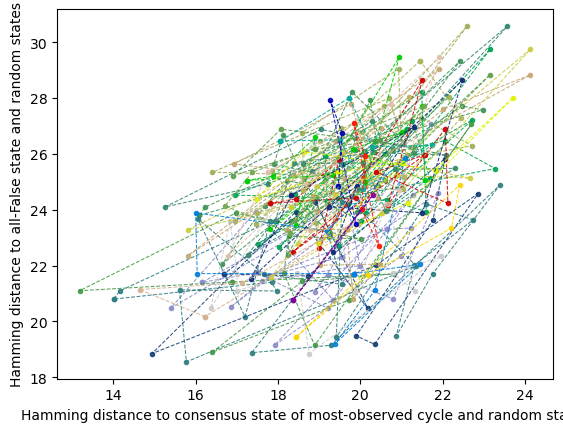

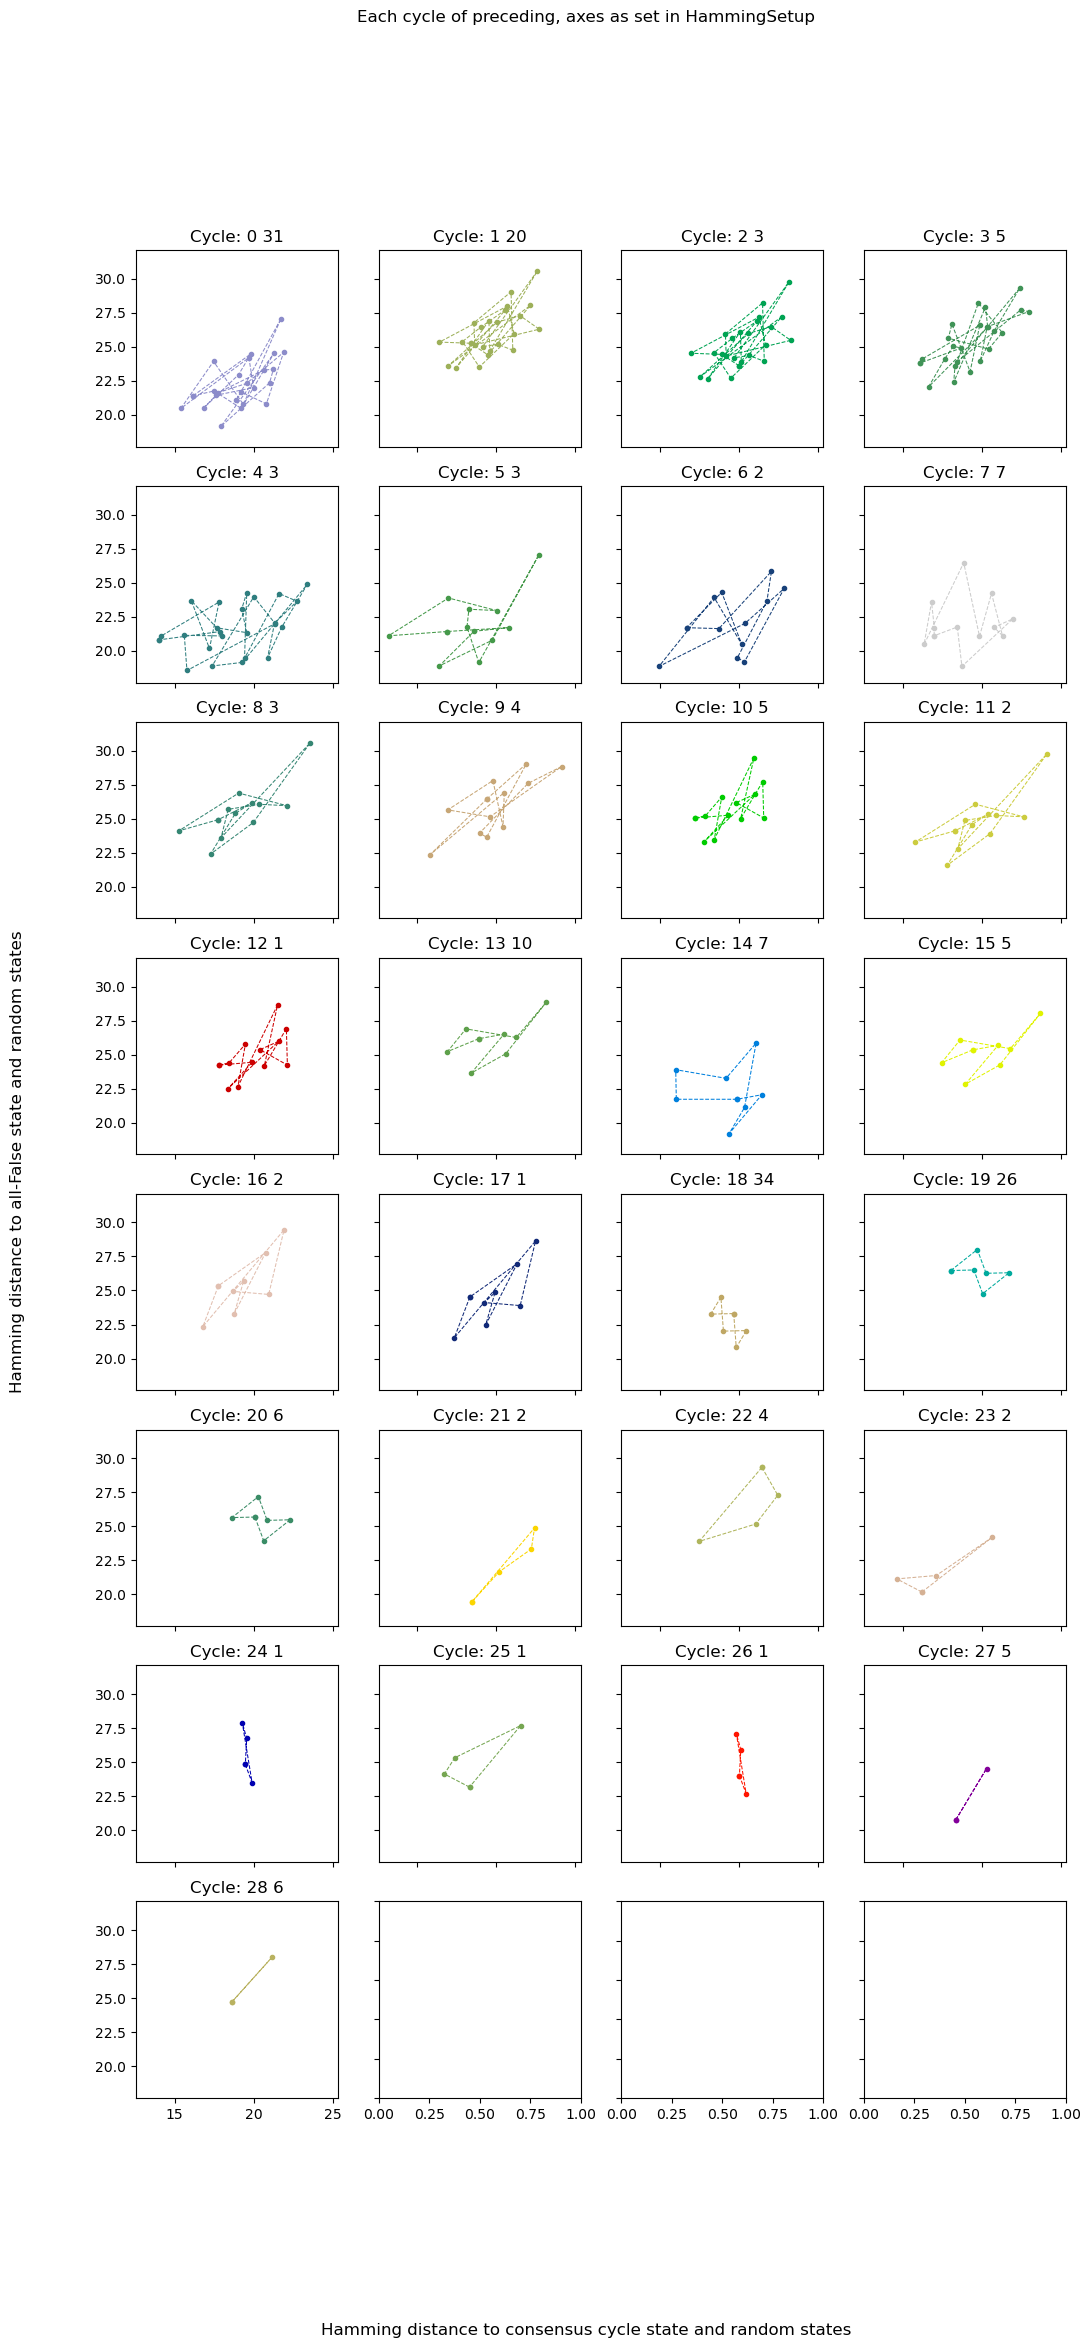

In [7]:
hamm_seq = HammingSetup(net)
hamming_plots(net, hamm_seq, bv_colors=setup_colors)

#### Transitions over unit perturbations to all cycle states

In [8]:
transitions(net)

Transitions resulting from unit perturbations of all observed cycle states of BooleanNetwork: N=20. avg_k= 1.45. Run-ins: 202. Observed cycles: 29. t_records: 202. u_records: 0
Cycle lengths: [24, 24, 24, 24, 24, 12, 12, 12, 12, 12, 12, 12, 12, 8, 8, 8, 8, 8, 6, 6, 6, 4, 4, 4, 4, 4, 4, 2, 2]
Number of cycle perturbations records: 6040 == 302 * 20(= sum(length of all cycles) * number of nodes)

The row represents the starting cycle index

The column represents the ending cycle index

        |     0      1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28    None  
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  0     |    262    36      0      0      0     20     20     24    

##### Transitions in same Hamming space as above

In [9]:
figure_3_5(net, hamm_seq, bv_colors=setup_colors)

NameError: name 'figure_3_5' is not defined

#### Graph representations of network

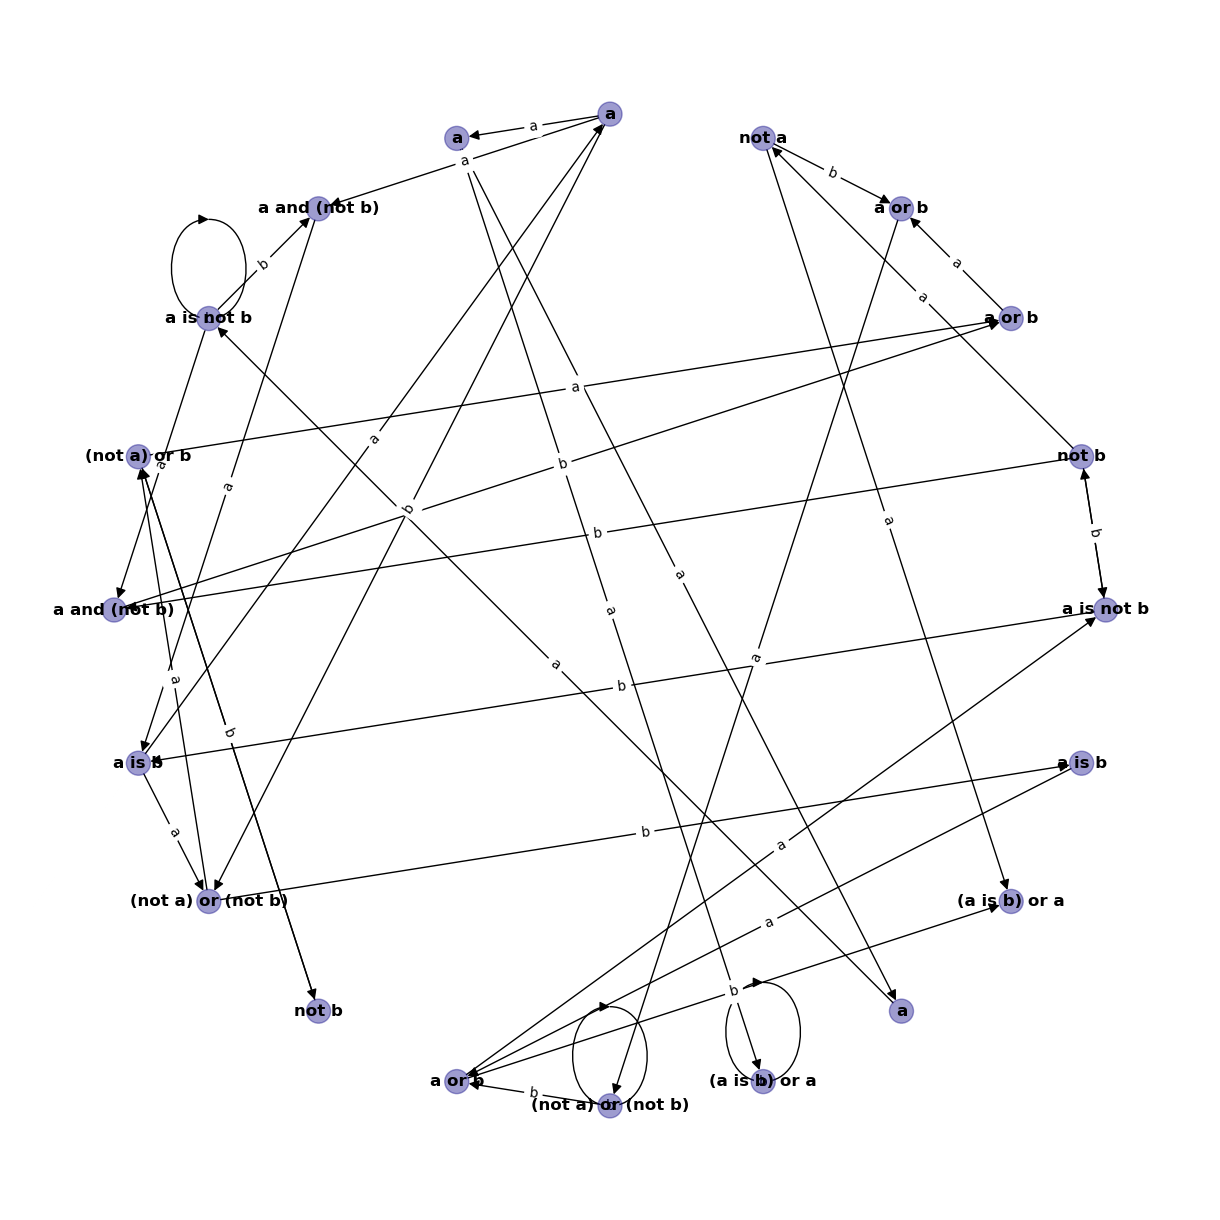

In [ ]:
fig = get_graph_representation(net)
fig.set_size_inches(w=12, h=12)
plt.show()

In [10]:
# make fig
# define function that modifies the fig
# call function after each add_cycle;
import matplotlib.pyplot as plt


#### Abundances as a function of Boolean states

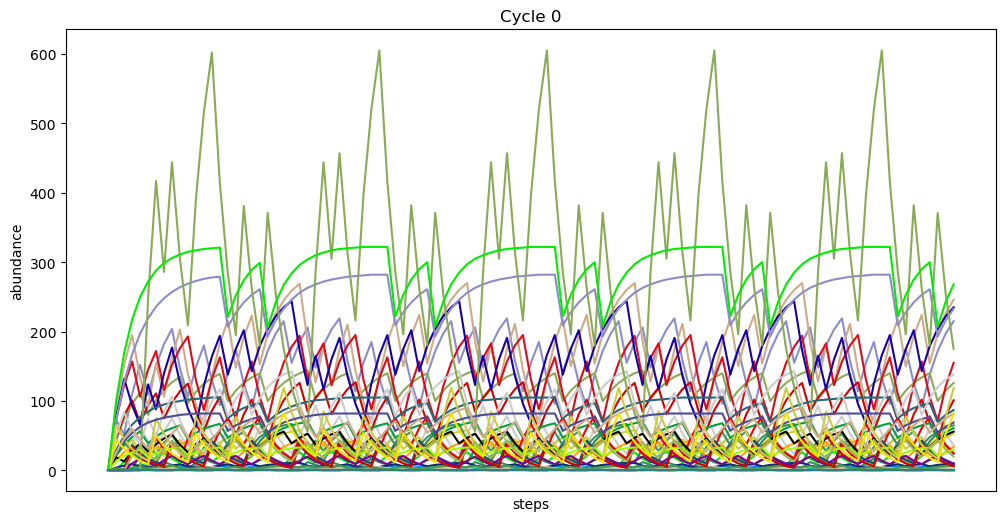

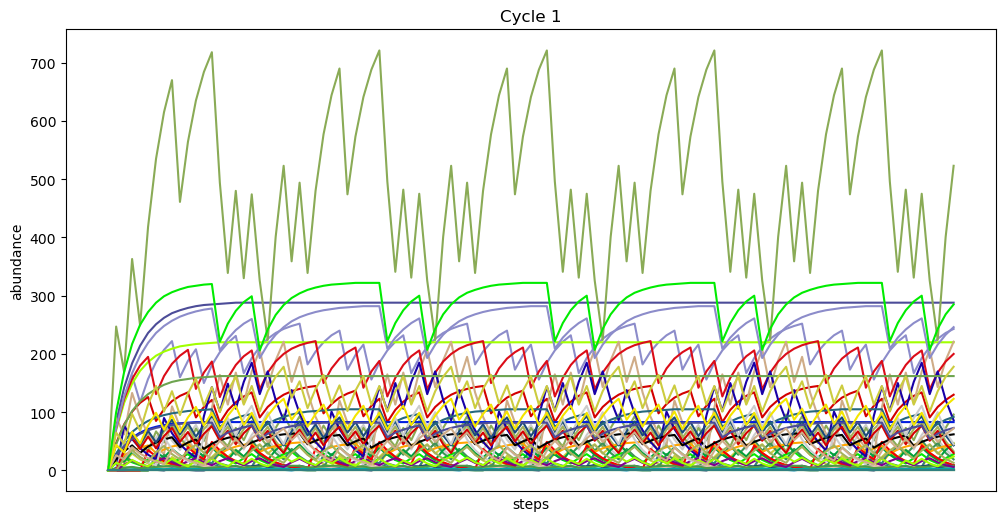

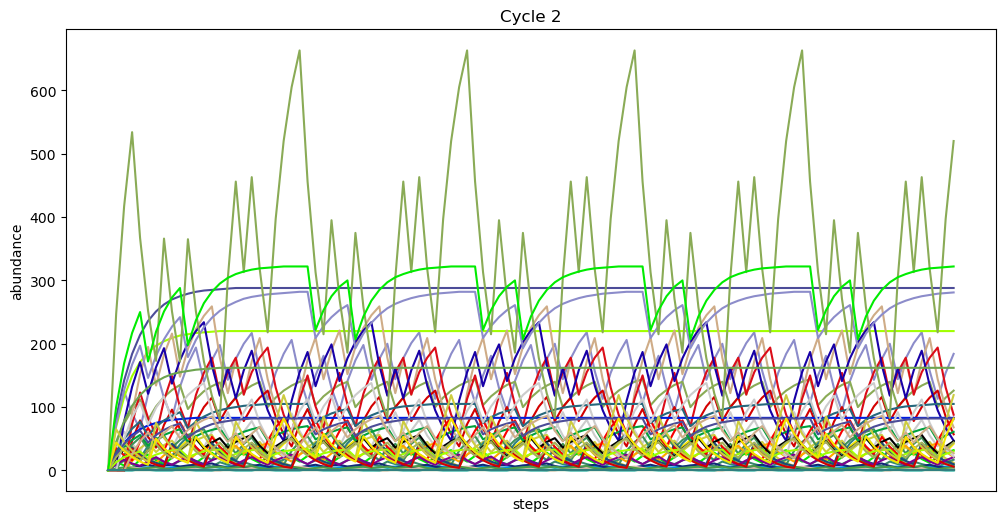

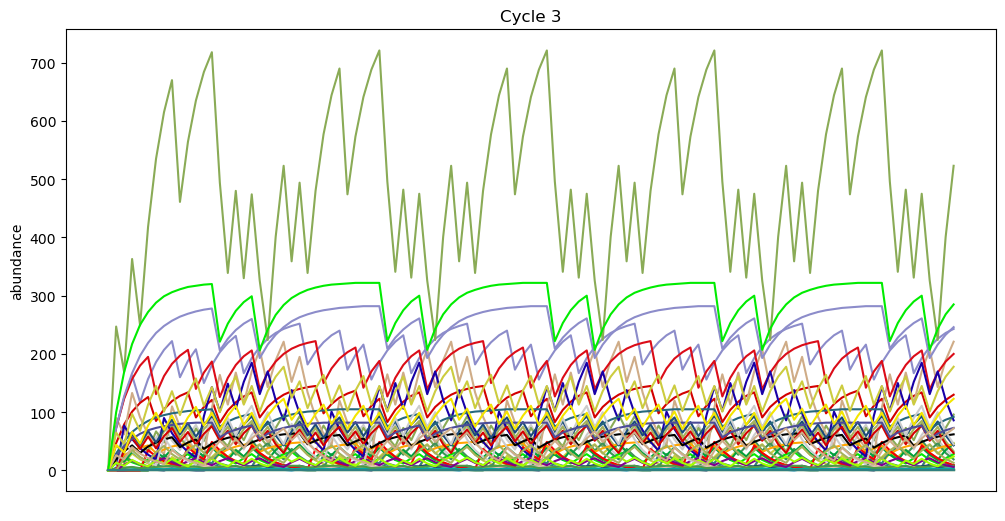

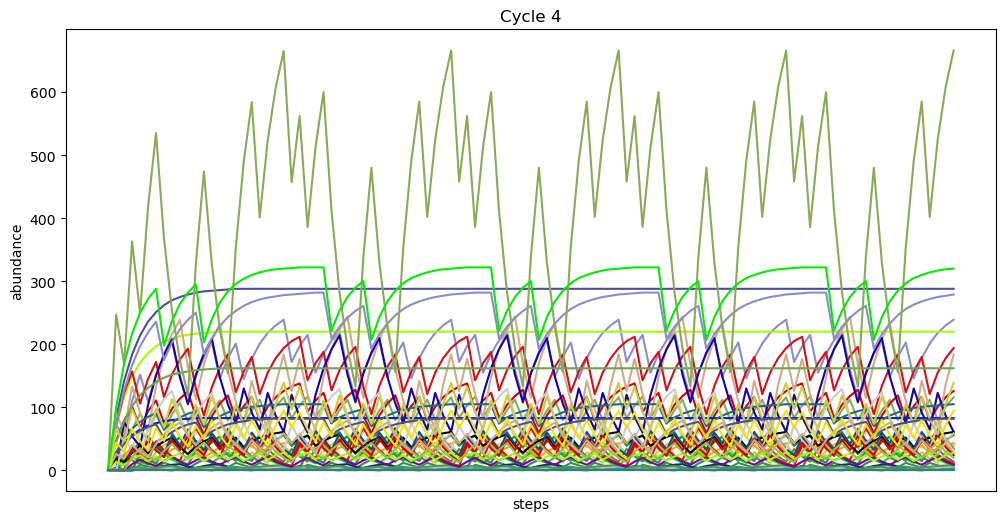

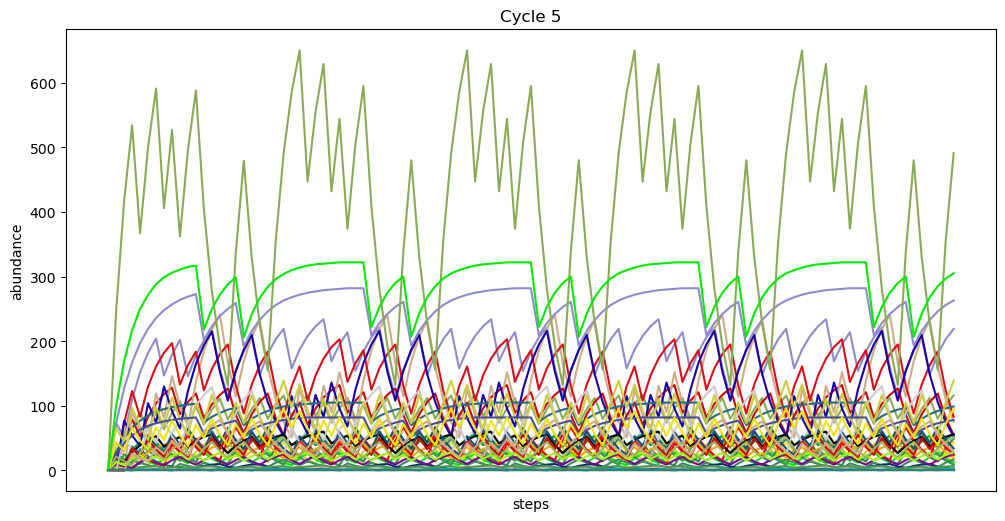

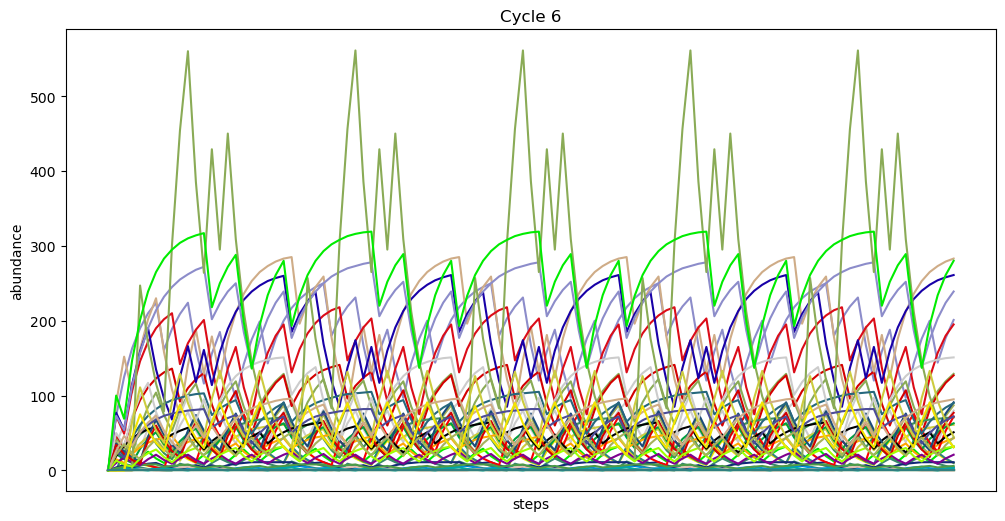

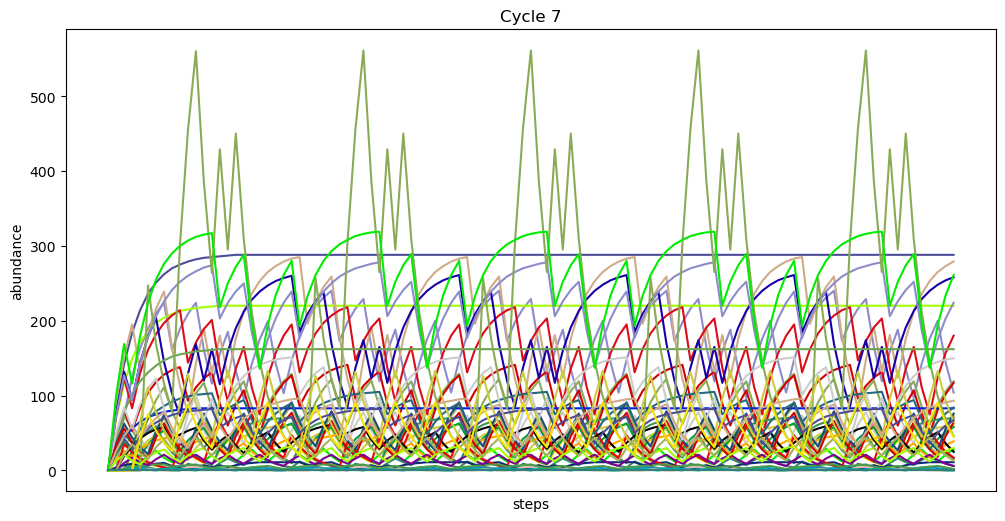

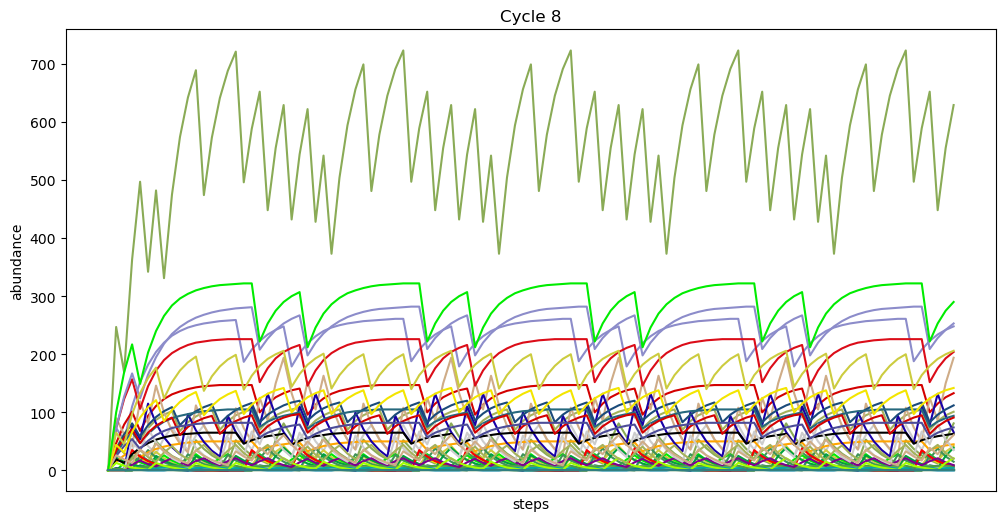

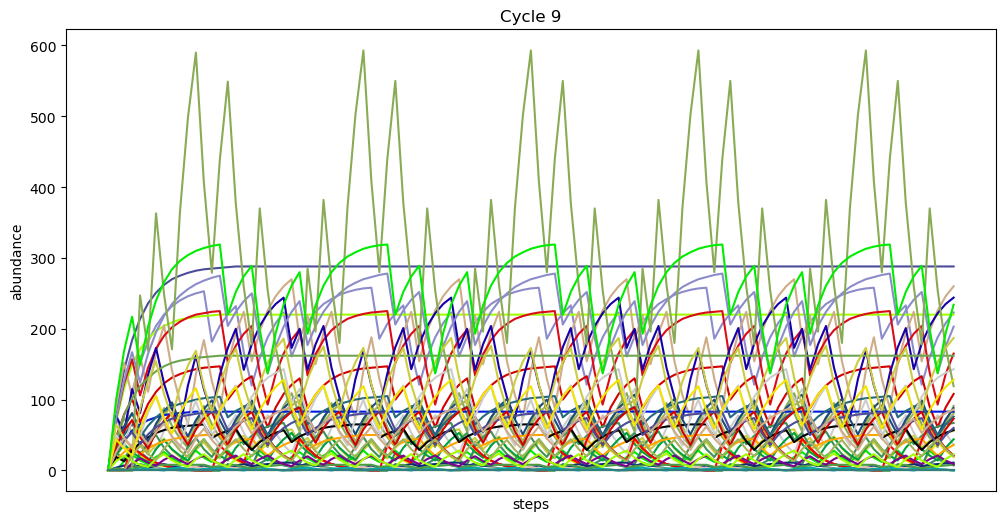

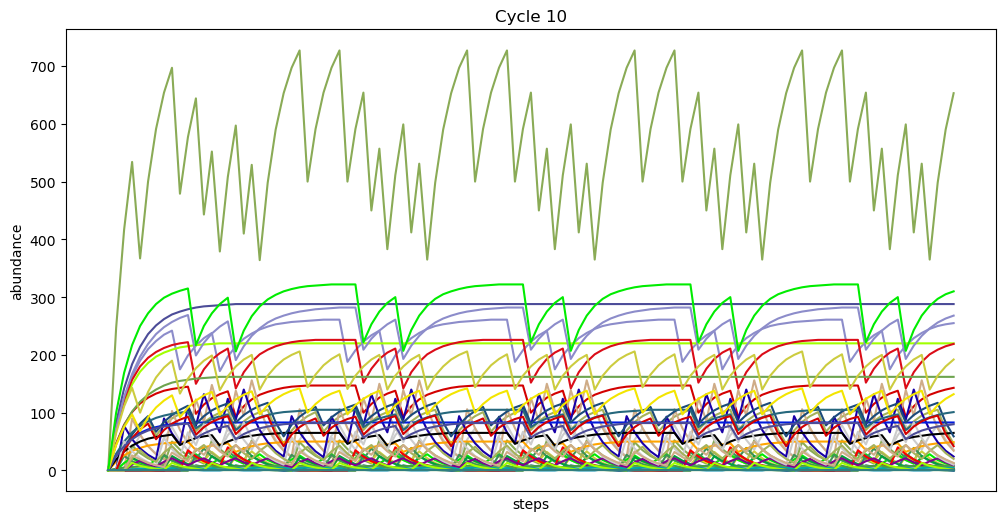

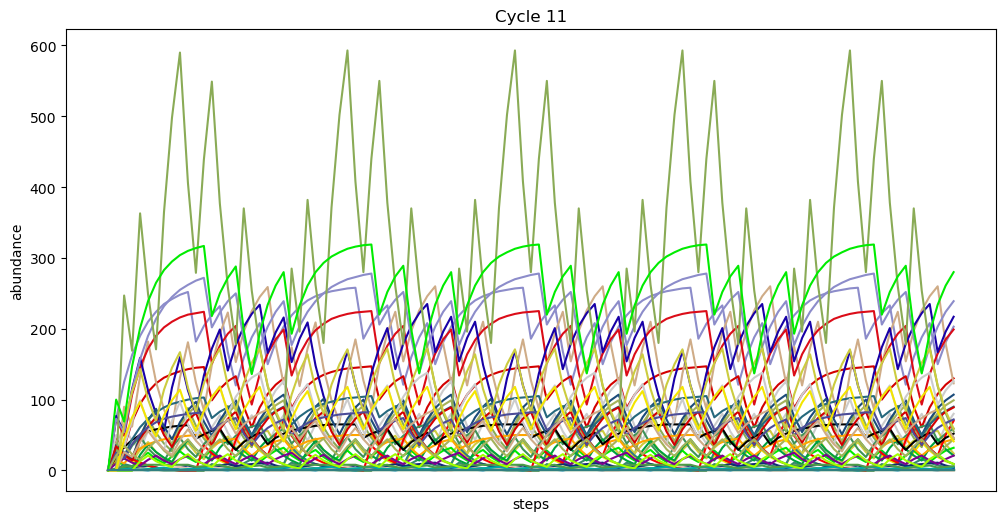

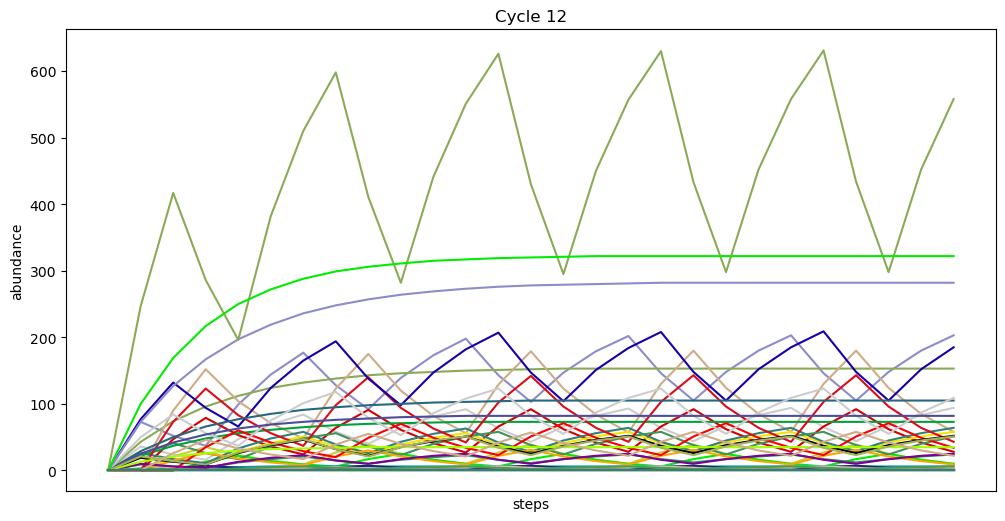

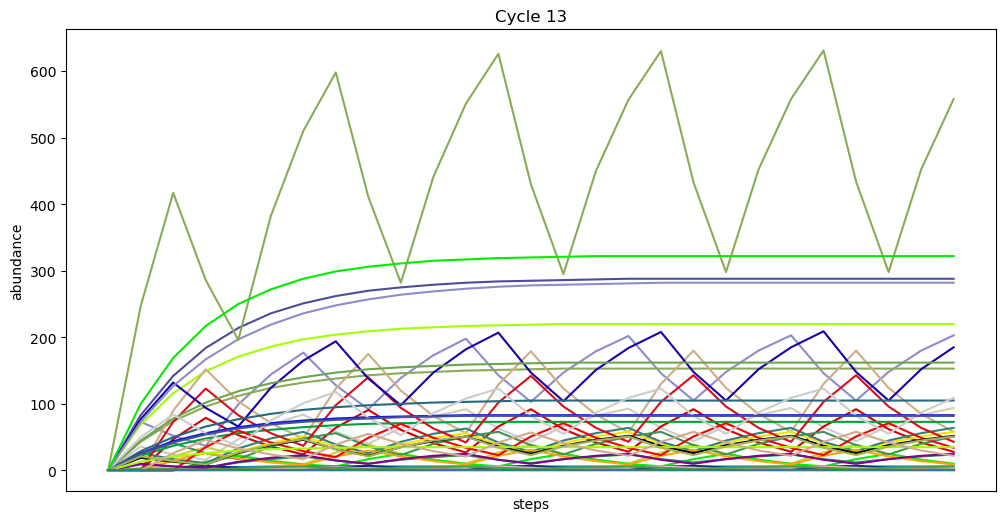

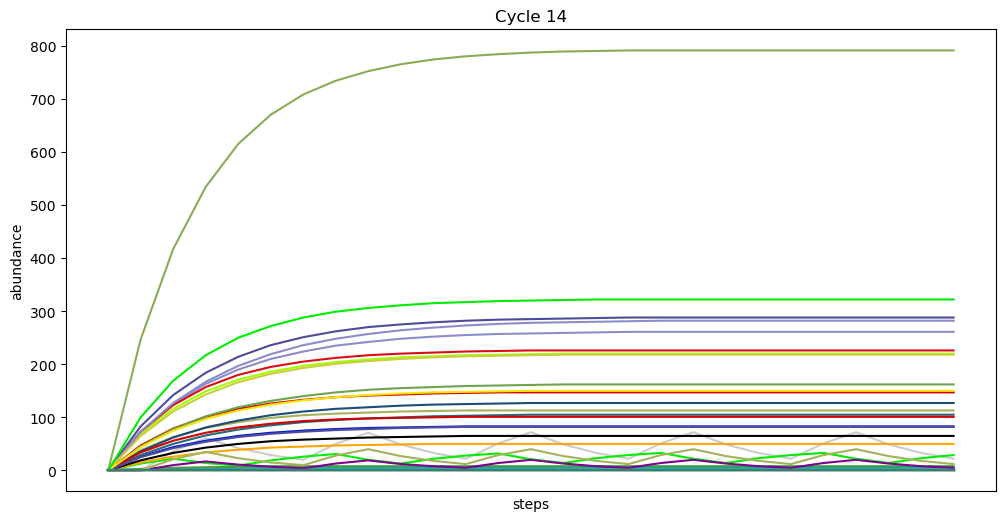

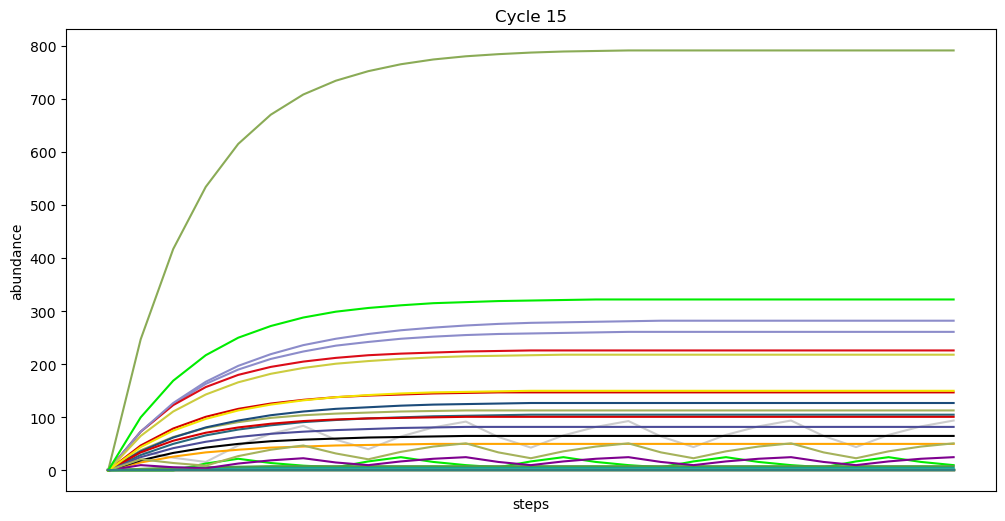

In [ ]:
for c in a_net.bn_collapsed_cycles.cycle_records:
    a_net.animate_boolean_states_list(c.cycle_states_list, 5, True)
    plot_abundances(a_net.current_abundances_list, f"Cycle {a_net.bn_collapsed_cycles.get_index(c.cycle_states_list[0])}", setup_colors, True, [], None, None, [12, 6], [])